# sample puzzles 2 label

In [77]:
import numpy as np
import json
import matplotlib.pyplot as plt
path = "/media/data/flowers/OpenELM/src/openelm/utils/preprocess_p3_emb.json"
with open(path, 'r') as f:
    data = json.load(f)
list_prg=[puz["program_str"] for puz in data]
for puzz in data:
    
    emb=np.array(puzz["emb"],dtype=int).tolist()
    puzz["emb"]=emb

In [78]:
(all_emb.sum(axis=1)==0).sum()

86

Text(0.5, 1.0, 'number of puzzle per skill (trainset)')

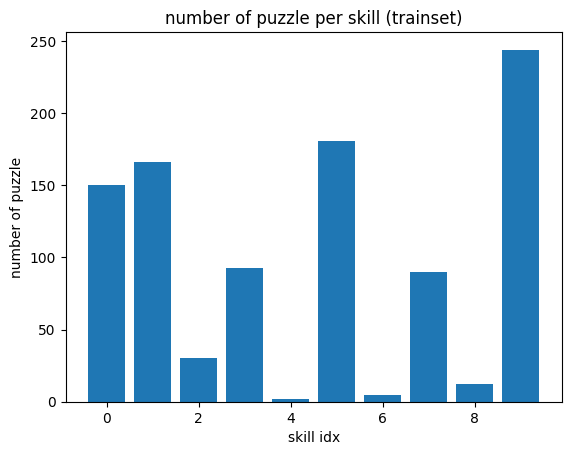

In [81]:
all_emb= [puzz["emb"] for puzz in data]
all_emb=np.array(all_emb,dtype=int)
sum_emb=np.sum(all_emb,axis=0)
plt.bar(np.arange(10),sum_emb)
plt.xlabel("skill idx")
plt.ylabel("number of puzzle")
plt.title("number of puzzle per skill (trainset)")

In [76]:
import numpy as np
import json
import copy
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=1)
list_puzzle_2_label=[]
list_label=np.array([0. for _ in range((10))])

path = "/media/data/flowers/OpenELM/src/openelm/utils/preprocess_p3_emb.json"
with open(path, 'r') as f:
    data = json.load(f)
list_prg=[puz["program_str"] for puz in data]
list_emb=[puz["emb"] for puz in data]
idx_uniform=rng.choice(len(data), 30, replace=False)
idx_uniform = np.sort(idx_uniform)[::-1]
print(len(data))
for idx_unif in idx_uniform:
    list_puzzle_2_label.append(copy.deepcopy(data[idx_unif]))
    list_label-=np.array(data[idx_unif]["emb"])
    del data[idx_unif]
print(len(data))

for idx_del,puzz in enumerate(data):
    
    emb=np.array(puzz["emb"],dtype=int).tolist()
    puzz["emb"]=emb
    if np.sum(emb)==10:# 10 skills is often a bug
        del data[idx_del]
print(len(data))


while len(list_puzzle_2_label)<60:
    idx_shuffle=np.array([i for i in range(len(data))])
    rng.shuffle(idx_shuffle)
    for choosen_idx in idx_shuffle:
        if len(list_puzzle_2_label)>=60:
            break
        #choose idx2aim (lowest skills sampled)
        all_emb= [puzz["emb"] for puzz in data]
        all_emb=np.array(all_emb,dtype=int)
        sum_emb=np.sum(all_emb,axis=0)
        sort_idx=list(np.argsort(list_label)[::-1])
        for idx2sample in sort_idx:
            if sum_emb[idx2sample]>0:
                break
        puzzle=data[choosen_idx]
        emb=puzzle["emb"]
        if emb[idx2sample]==1:
            list_puzzle_2_label.append(puzzle)
            list_label-=np.array(emb)
            del data[choosen_idx]
            break
        
all_emb= [puzz["emb"] for puzz in data]
all_emb=np.array(all_emb,dtype=int)
sum_emb=np.sum(all_emb,axis=0)

list_label,sum_emb


536
506
506


(array([-13., -14., -14., -14.,  -2., -18.,  -5., -16., -12., -28.]),
 array([137, 152,  16,  79,   0, 163,   0,  74,   0, 216]))

In [ ]:
(subset2label)

Text(0.5, 1.0, 'number of puzzle per skill (subset2label)')

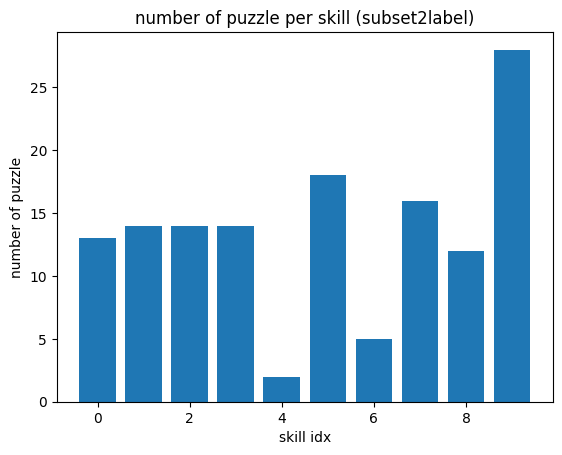

In [82]:
plt.bar([i for i in range(10)],-list_label)
plt.xlabel("skill idx")
plt.ylabel("number of puzzle")
plt.title("number of puzzle per skill (subset2label)" )

In [ ]:
# save
list_puzzle_2_label
path = "/media/data/flowers/OpenELM/tests/subset2label.json"
with open(path, 'w') as f:
    json.dump(list_puzzle_2_label,f,indent=4)



In [85]:
#load
list_puzzle_2_label
path = "/media/data/flowers/OpenELM/tests/subset2label.json"
with open(path, 'r') as f:
    data2label = json.load(f)

In [89]:
#split in two
data2label_jul = data2label[:30]
data2label_lae = data2label[30:]
# save

path = "/media/data/flowers/OpenELM/tests/subset2label_jul.json"
with open(path, 'w') as f:
    json.dump(data2label_jul,f,indent=4)
path = "/media/data/flowers/OpenELM/tests/subset2label_lae.json"
with open(path, 'w') as f:
    json.dump(data2label_lae,f,indent=4)

In [14]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from openelm.environments.p3 import skill_list

puzz_1="/media/data/flowers/OpenELM/tests/subset2label_jul.json"
puzz_2="/media/data/flowers/OpenELM/tests/subset2label_lae.json"
puzz_save="/media/data/flowers/OpenELM/tests/subset2label_jul-lae.json"
with open(puzz_1, 'r') as f:
    puzz_1 = json.load(f)
with open(puzz_2, 'r') as f:    
    puzz_2 = json.load(f)

all_puzz=puzz_1+puzz_2
with open(puzz_save, 'w') as f:    
    json.dump(all_puzz,f,indent=4)


# plot

In [9]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from openelm.environments.p3 import skill_list

puzz_1="/media/data/flowers/OpenELM/tests/subset2label_jul.json"
puzz_2="/media/data/flowers/OpenELM/tests/subset2label_lae.json"
with open(puzz_1, 'r') as f:
    puzz_1 = json.load(f)
with open(puzz_2, 'r') as f:    
    puzz_2 = json.load(f)

puzz_1=puzz_1+puzz_2
# check if "GT_emb" is in the first or second dict and add the misssing key
for i in range(len(puzz_1)):
    if "GT_emb" in puzz_1[i]:
        pass
    else : 
        del puzz_1[i]
        print("error",i)
    # elif "GT_emb" in puzz_2[i]:
    #     puzz_1[i]["GT_emb"]=puzz_2[i]["GT_emb"]
    # else: 
    #     print("error",i)
GT_target=[puzz["GT_emb"] for puzz in puzz_1]
predic_emb=[puzz["emb"] for puzz in puzz_1]
GT_target[:4],predic_emb[:4]

([[0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]],
 [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]])

In [15]:
#gpt4 label
path="/media/data/flowers/OpenELM/tests/subset2label_jul-lae_gpt4.json"
with open(path, 'r') as f:
    puzz_1 = json.load(f)
GT_target=[puzz["GT_emb"] for puzz in puzz_1]
predic_emb=[puzz["gpt4_label"] for puzz in puzz_1]
# predic_emb=[puzz["emb"] for puzz in puzz_1]
GT_target[:4],predic_emb[:4]

([[0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]],
 [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]])

In [17]:
#gpt4 label
path="/media/data/flowers/OpenELM/tests/subset2label_jul-lae_gpt.json"
with open(path, 'r') as f:
    puzz_1 = json.load(f)
GT_target=[puzz["GT_emb"] for puzz in puzz_1]
predic_emb=[puzz["gpt4_label"] for puzz in puzz_1]
# predic_emb=[puzz["emb"] for puzz in puzz_1]
GT_target[:4],predic_emb[:4]

([[0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]],
 [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]])

i  :Sorting and
Searching
[[0.5        0.5       ]
 [0.41176471 0.58823529]]
i  :Counting and
combinatorics
[[0.80851064 0.19148936]
 [0.38461538 0.61538462]]
i  :Tree and
Graph problem
[[0.87755102 0.12244898]
 [0.27272727 0.72727273]]
i  :Math
[[0.94444444 0.05555556]
 [0.5        0.5       ]]
i  :Bit Manipulation
[[0.98333333 0.01666667]
 [       nan        nan]]
i  :String Manipulation
[[0.93181818 0.06818182]
 [0.0625     0.9375    ]]
i  :Geometry
[[0.95918367 0.04081633]
 [0.54545455 0.45454545]]
i  :Recursion and
Dynamic Programming
[[0.71929825 0.28070175]
 [0.33333333 0.66666667]]
i  :Stacks and
Queues
[[0.88888889 0.11111111]
 [0.83333333 0.16666667]]
i  :Optimization
[[0.53333333 0.46666667]
 [0.13333333 0.86666667]]


/tmp/ipykernel_23630/1083392242.py:29: RuntimeWarning: invalid value encountered in divide
  matrix = confusion_matrix[i] / confusion_matrix[i].sum(axis=1, keepdims=True)


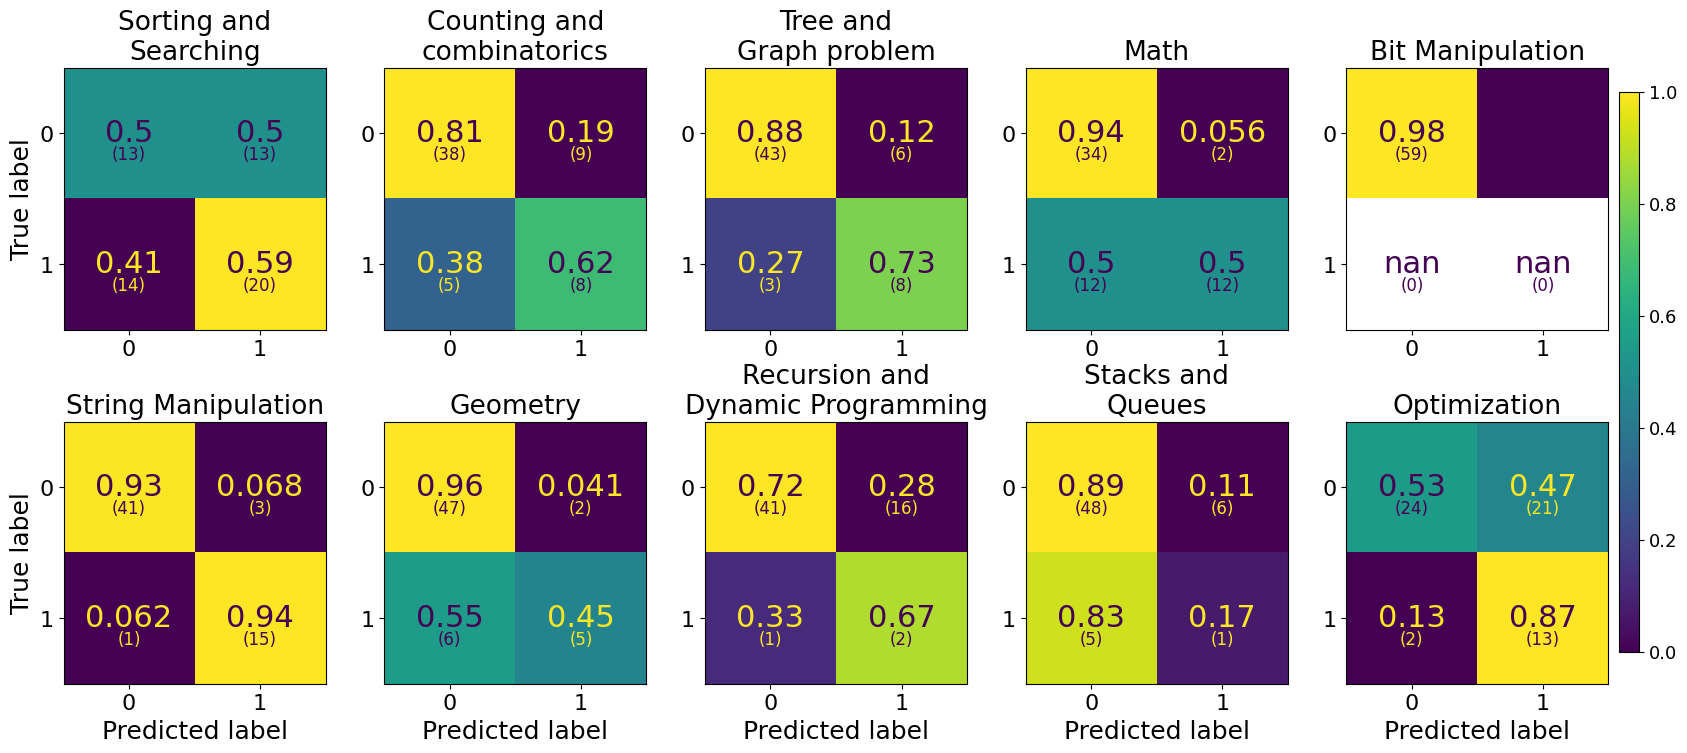

In [18]:
from sklearn.metrics import multilabel_confusion_matrix
from openelm.environments.p3 import skill_list
import matplotlib.pyplot as plt
import sklearn.metrics as skmetr
skill_list=['Sorting and\nSearching',
 'Counting and\ncombinatorics',
 'Tree and\nGraph problem',
 'Math',
 'Bit Manipulation',
 'String Manipulation',
 'Geometry',
 'Recursion and\nDynamic Programming',
 'Stacks and\nQueues',
 'Optimization']
# skill_list[7] = 'Recursion and \nDynamic Programming'
normalize = "true"

f, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()
f.subplots_adjust(hspace=0.35)
confusion_matrix = multilabel_confusion_matrix(y_true=GT_target, y_pred=predic_emb)

# Get the min and max values for the colorbar
vmin = 0
vmax = 1 if normalize in ["true", "all"] else confusion_matrix.max()

for i, ax in enumerate(axes):
    if normalize == "true":
        matrix = confusion_matrix[i] / confusion_matrix[i].sum(axis=1, keepdims=True)
    elif normalize == "all":
        matrix = confusion_matrix[i] / confusion_matrix[i].sum()
    else:
        matrix = confusion_matrix[i]
    print("i  :"+skill_list[i])
    print(matrix)
    disp = skmetr.ConfusionMatrixDisplay(matrix, display_labels=[0, 1])
    disp.plot(ax=ax, values_format='.2g', cmap='viridis', colorbar=False)

    # Increase font size for the normalized values and annotate with raw values
    for j in range(2):
        for k in range(2):
            # Get the current text value (normalized value)
            current_text = disp.text_[j, k].get_text()
            
            # Get the color of the normalized value
            current_color = disp.text_[j, k].get_color()
            
            # Set the font size for the normalized value
            disp.text_[j, k].set_fontsize(22)
            
            # Annotate with the raw value from the confusion matrix in parentheses
            ax.annotate("({})".format(confusion_matrix[i][j, k]),
                        xy=disp.text_[j, k].get_position(),
                        ha='center',
                        va='center_baseline',
                        fontsize=12,  # Smaller font size for the raw value
                        xytext=(0, -14),  # Adjust this offset as needed
                        textcoords='offset points',
                        color=current_color)  # Set the color to match the normalized value


            
    # Increase font size for titles
    disp.ax_.set_title(skill_list[i], fontsize=19)
    
    # Hide x and y labels for all subplots
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Increase font size for tick labels
    ax.tick_params(axis='both', which='major', labelsize=16)

# Set x and y labels for the desired subplot with increased font size
for i in range(5,10):
    axes[i].set_xlabel('Predicted label', fontsize=18)  # Bottom left subplot for xlabel
axes[5].set_ylabel('True label', fontsize=18)        # Top left subplot for ylabel
axes[0].set_ylabel('True label', fontsize=18)        # Top left subplot for ylabel

# Add a single colorbar to the figure
cbar_ax = f.add_axes([0.904, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.tick_params(labelsize=13)  # Increase font size for colorbar tick labels

# plt.tight_layout(pad=0.8)
# plt.savefig("/media/data/flowers/OpenELM/last_fig/confusion_matrix.pdf")
plt.show()


# other stuff

In [ ]:
import numpy as np

truth_labels = [
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
]

detected_labels = [
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
]



# number of labels
n_labels = len(truth_labels[0])

# initialize matrix
matrix = np.zeros((n_labels, n_labels))

# count for each ground truth label
label_counts = np.zeros(n_labels)



for truth, detected in zip(truth_labels, detected_labels):
    for i in range(n_labels):
        if truth[i] == 1:
            label_counts[i] += 1
            for j in range(n_labels):
                if detected[j] == 1:
                    matrix[i][j] += 1

# Normalize
for i in range(n_labels):
    if label_counts[i] != 0:
        matrix[i] = matrix[i] / label_counts[i]

print(matrix)


In [ ]:
path_rd="/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm="/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl="/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd,path_elm,path_elm_nl,path_imrd,path_imgep]
name=["rd","elm","elm_nl","imrd","imgep"]
list_res=[]
for i,path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg=[puz["program_str"] for puz in data]


In [ ]:
import itertools
def generate_vectors(n):
    return [list(p) for p in itertools.product([0, 1], repeat=n)]

vectors = generate_vectors(10)
for vector in vectors:
    print(vector)
dic={str(vector): [] for vector in vectors}